In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [2]:
fraud_check=pd.read_csv("Fraud_check.csv")
fraud_check

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
fraud_check.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [4]:
fraud_check["income"]="<=30000"

In [5]:
fraud_check.loc[fraud_check["Taxable.Income"]>=30000,"income"]="Good"

In [6]:
fraud_check.loc[fraud_check["Taxable.Income"]<=30000,"income"]="Risky"

In [7]:
fraud_check

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,income
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [8]:
fraud_check.income.value_counts()

Good     476
Risky    124
Name: income, dtype: int64

In [9]:
#complite Farud_Check Data Set
label_encoder=preprocessing.LabelEncoder()
fraud_check['income']=label_encoder.fit_transform(fraud_check['income'])
fraud_check['Undergrad']=label_encoder.fit_transform(fraud_check['Undergrad'])
fraud_check['Urban']=label_encoder.fit_transform(fraud_check['Urban'])
fraud_check['Marital.Status']=label_encoder.fit_transform(fraud_check['Marital.Status'])

In [10]:
fraud_check

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,income
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,0
596,1,0,69967,55369,2,1,0
597,0,0,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0


In [11]:
fraud_check=fraud_check.drop(['Taxable.Income'],axis=1)


In [12]:
fraud_check

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,income
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


In [13]:
fraud_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int32
 1   Marital.Status   600 non-null    int32
 2   City.Population  600 non-null    int64
 3   Work.Experience  600 non-null    int64
 4   Urban            600 non-null    int32
 5   income           600 non-null    int32
dtypes: int32(4), int64(2)
memory usage: 18.9 KB


In [14]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [15]:
df_norm = norm_func(fraud_check.iloc[:,0:])
df_norm.tail(10)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,income
590,0.0,0.5,0.341473,0.466667,1.0,0.0
591,1.0,1.0,0.615406,0.600000,1.0,1.0
592,1.0,1.0,0.283703,0.533333,0.0,0.0
593,0.0,0.0,0.610256,0.333333,1.0,0.0
594,0.0,0.5,0.412341,0.300000,1.0,0.0
595,1.0,0.0,0.078811,0.233333,1.0,0.0
596,1.0,0.0,0.170058,0.066667,1.0,0.0
597,0.0,0.0,0.737240,0.000000,1.0,0.0
598,1.0,0.5,0.886810,0.566667,0.0,0.0
599,0.0,0.0,0.760683,0.533333,0.0,0.0


In [16]:
fraud_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int32
 1   Marital.Status   600 non-null    int32
 2   City.Population  600 non-null    int64
 3   Work.Experience  600 non-null    int64
 4   Urban            600 non-null    int32
 5   income           600 non-null    int32
dtypes: int32(4), int64(2)
memory usage: 18.9 KB


In [17]:
x=df_norm.iloc[:,0:5]
y=df_norm.iloc[:,5]

In [18]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0.0,1.0,0.139472,0.333333,1.0
1,1.0,0.0,0.622394,0.600000,1.0
2,0.0,0.5,0.772568,1.000000,1.0
3,1.0,1.0,0.962563,0.500000,1.0
4,0.0,0.5,0.010081,0.933333,0.0
...,...,...,...,...,...
595,1.0,0.0,0.078811,0.233333,1.0
596,1.0,0.0,0.170058,0.066667,1.0
597,0.0,0.0,0.737240,0.000000,1.0
598,1.0,0.5,0.886810,0.566667,0.0


In [19]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
595    0.0
596    0.0
597    0.0
598    0.0
599    0.0
Name: income, Length: 600, dtype: float64

In [20]:
# Splitting data into training and testing data set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

Decision Tree Model

Building desion tree classifier using entropy criteria

In [21]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

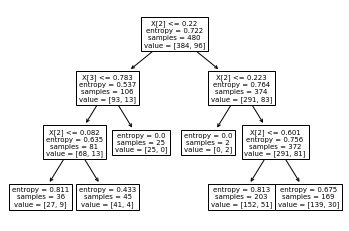

In [22]:
tree.plot_tree(model);

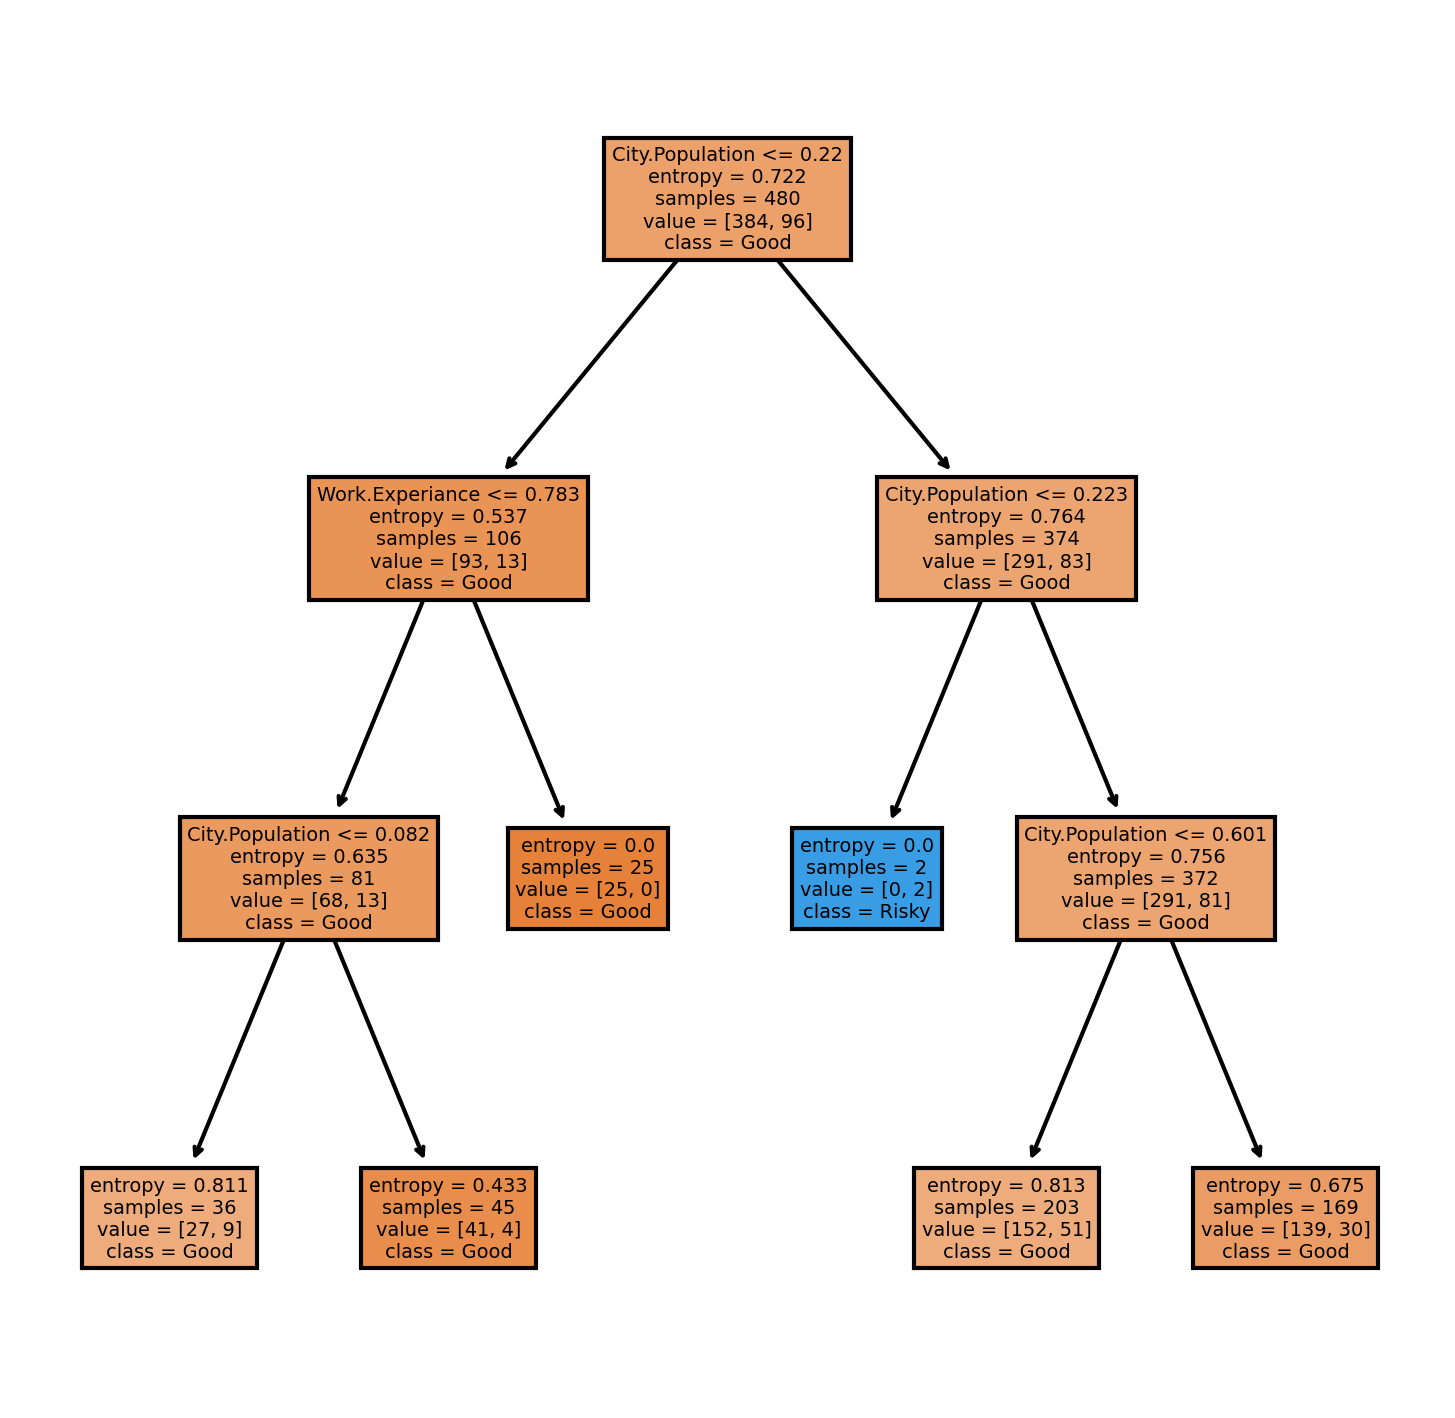

In [23]:

fn = ['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experiance', 'Urban']
cn=['Good','Risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [24]:
model.feature_importances_ 

array([0.        , 0.        , 0.71003667, 0.28996333, 0.        ])

In [25]:
import pandas as pd
feature_imp = pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False) 
feature_imp

City.Population    0.710037
Work.Experiance    0.289963
Undergrad          0.000000
Marital.Status     0.000000
Urban              0.000000
dtype: float64

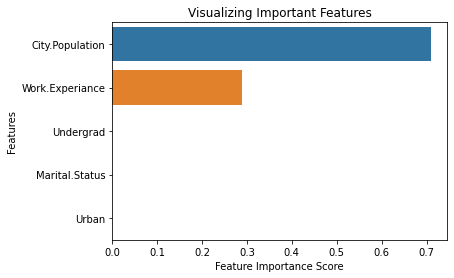

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [27]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category  

0.0    120
dtype: int64

In [28]:
preds 

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [29]:
pd.crosstab(y_test,preds)

col_0,0.0
income,
0.0,92
1.0,28


In [30]:
np.mean(preds==y_test)

0.7666666666666667

In [31]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3) 

In [32]:
model_gini.fit(x_train, y_train) 

DecisionTreeClassifier(max_depth=3)

In [33]:
#Prediction and computing the accuracy
pred=model_gini.predict(x_test)
np.mean(pred==y_test)

0.7583333333333333

In [34]:
model_gini.feature_importances_ 

array([0.        , 0.        , 0.94815922, 0.        , 0.05184078])

In [35]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [36]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0.0,1.0,0.139472,0.333333,1.0
1,1.0,0.0,0.622394,0.600000,1.0
2,0.0,0.5,0.772568,1.000000,1.0
3,1.0,1.0,0.962563,0.500000,1.0
4,0.0,0.5,0.010081,0.933333,0.0
...,...,...,...,...,...
595,1.0,0.0,0.078811,0.233333,1.0
596,1.0,0.0,0.170058,0.066667,1.0
597,0.0,0.0,0.737240,0.000000,1.0
598,1.0,0.5,0.886810,0.566667,0.0


In [37]:
array=x.values

In [38]:
X = array[:,0:4] 
Y = array[:,4] 

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42) 

In [40]:
model = DecisionTreeRegressor(max_depth = 3)
model.fit(X_train, Y_train)  

DecisionTreeRegressor(max_depth=3)

In [41]:
#Find the testing accuracy
model.score(X_test,Y_test) 

-0.04564650494329703

In [42]:
#Find the training accuracy
model.score(X_train, Y_train) 

0.06233243527762522